# Python: intrabrand competition

In the Hart and Tirole (1990) set up, the equilibrium is different from the standard one. Contracts are not publicly observable and agents have passive beliefs. This leads to a different definition of equilibrium than we have used before.

This notebook shows you to derive an equilibrium numerically in this set up.

First, we import the libraries that we need.

In [1]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

## demand, costs and profits

We consider the model in the lecture with one Upstream firm $U$ and two Downstream firms $D_1,D_2$. We assume linear demand $p(x_1,x_2)=1-x_1-x_2$ and zero costs both upstream and downstream, $c=\gamma=0$.

In [2]:
c = 0
gamma = 0
def demand(x1,x2):
    return 1-x1-x2
def profit_D(x1,x2):
    return demand(x1,x2)*x1-gamma*x1

## public contracts

With public contracts and two part tariffs, $U$ can appropriate all rents from the downstream firms. Hence, $U$ sets $x_1,x_2$ to maximize the sum of downstream profits $\pi(x_1,x_2)+\pi(x_2,x_1)-c(x_1+x_2)$.

In [3]:
def minus_industry_profits(vx):
    return -(profit_D(vx[0],vx[1])+profit_D(vx[1],vx[0])-c*(vx[0]+vx[1])) 
    # the optimize.brute routine that we use, minimizes a function

public_contracts = optimize.brute(minus_industry_profits, ((0.0,1.0),(0.0,1.0),))
print public_contracts

[  2.01328278e-04   4.99790473e-01]


Now what does this mean?

## private contracts

With private contracts, $D_i$ cannot observe the output level $x_j$ in $D_j$'s contract. Hence, the amount $D_i$ is willing to pay $U$ cannot be $\pi_i(x_i,x_j)$ as $D_i$ does not know $x_j$.

$D_i$ can have an expectation about $x_j$; this expectation we denote $x_j^e$. In equilibrium, this expectation has to be correct: $x_j^e = x_j$. Further, we assume passive beliefs; that is, if $D_i$ gets a deviation offer $\tilde x_i \neq x_i$, $D_i$ does not change $x_j^e$.

Hence, given belief $x_j^e$, the optimal offer $x_i$ to $D_i$ solves
$$
\max_x \pi(x,x_j^e) - cx
$$

The function `reaction_U` calculates $U$'s optimal reaction to `beliefs` $x_1^e,x_2^e$.

In [4]:
def reaction_U(beliefs): # beliefs[0] is D_2's belief about x1; beliefs[1] is D_1's belief about x2
    x1 = optimize.brute(lambda x: -(profit_D(x,beliefs[1])-c*x), ((0,1,),))
    x2 = optimize.brute(lambda x: -(profit_D(x,beliefs[0])-c*x), ((0,1,),))
    return [x1[0],x2[0]]

## symmetric equilibrium

In a symmtric equilibrium we must have that
$$
x = \arg\max_{x'} \pi(x',x)-cx'
$$

That is, it is optimal for $U$ to offer $D_i$ output level $x' = x$ while $D_i$ believes that $x_j=x_j^e=x$.

In other words, we are looking for the intersection point of the optimal reaction to belief $x_i^e$ and the 45-degree line:

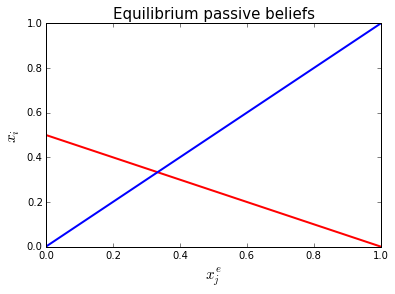

In [8]:
range_beliefs = arange(0.0,1.01,0.01)
range_x = [reaction_U([x,x])[0] for x in range_beliefs]

plt.clf()
plt.plot(range_beliefs, range_x,'-', color = 'r', linewidth = 2)
plt.plot(range_beliefs, range_beliefs,'-', color = 'b', linewidth = 2)
plt.title("Equilibrium passive beliefs",fontsize = 15)
plt.xlabel("$x_j^e$",fontsize = 15)
plt.ylabel("$x_i$",fontsize = 15,rotation = 90)
# plt.xlim(c,1.0)
# plt.ylim(0.0,0.3)
plt.savefig('passive_beliefs.png')

To find the equilibrium, we define a fixed point mapping. That is, if beliefs are $x$, then the optimal reaction by $U$ to these beliefs should also be $x$ (think of $x$ either as a vector here or as a scalar with $x_1=x_2=x$).

From the graph we guess that the equilibrium is around $x=0.3$

In [9]:
x0 = [0.3,0.3]

def fixed_point(x):
    return x - reaction_U(x)
ans = optimize.fsolve(fixed_point, x0, args = ())
print ans

[ 0.33332648  0.33332648]


Indeed, as we found in the lecture, the optimal output level with two downstrea firms equals the duopoloy Cournot output level.